<a href="https://colab.research.google.com/github/kthanikonda/DataWithPython/blob/main/Real_Estate_Project-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Dataset Selection and Initial Exploration

**Dataset:** Real Estate Sales Data (2001-2022)

**Source:** https://www.kaggle.com/datasets/omniamahmoudsaeed/real-estate-sales-2001-2022

**About Dataset:** This dataset provides detailed information about property sales over two decades, from 2001 to 2022. It contains records of property transactions, including the town of sale, sale amounts, assessed values, property types, and remarks from assessors. The dataset is suitable for analyzing real estate trends, valuation accuracy, and geographic property distributions.

### About the Columns in the Dataset

This dataset contains information about property sales. Below is what each column represents:

1. **Serial Number -** A unique ID for each property.  
2. **List Year -** The year the property was listed for sale.  
3. **Date Recorded -** When the sale was officially recorded.  
4. **Town -** The city or town where the property is located.  
5. **Address -** The street address of the property.  
6. **Assessed Value -** The value assigned for tax purposes.  
7. **Sale Amount -** The actual price the property sold for.  
8. **Sales Ratio -** Compares the sale price to the assessed value.  
9. **Property Type -** The type of property (e.g., Residential, Commercial).  
10. **Residential Type -** If residential, the specific type (e.g., Single Family).  
11. **Non Use Code -** Codes for properties not typically used (e.g., vacant land).  
12. **Assessor Remarks -** Additional notes from the assessor.  
13. **OPM Remarks -** Notes from the Office of Property Management.  
14. **Location -** The exact geographic coordinates (latitude and longitude).



# 2. Importing the Dataset into Colab

*   To begin the analysis, we first upload the dataset to Google Colab using the `files.upload()` method provided by `google.colab`. After uploading, we read the dataset using `pandas` and `pd.read_csv`.
*   We display the first few rows to get an initial idea of what the data looks like using `df.head()`


In [2]:
from google.colab import files
import os

uploaded = files.upload()

Saving Real_Estate_Sales_2001-2022_GL.csv to Real_Estate_Sales_2001-2022_GL.csv


In [3]:
import pandas as pd

df = pd.read_csv("Real_Estate_Sales_2001-2022_GL.csv")

df.head()

<ipython-input-3-50b421269604>:3: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Real_Estate_Sales_2001-2022_GL.csv")


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Residential,Condo,NaN,NaN,NaN,POINT (-72.879115982 41.773452988)


### Initial Questions / Areas of Interest

1. **How have average property sale prices evolved over the years (2001-2022)?**  
   We want to explore trends in property values and identify any significant market shifts.

2. **Is there a significant discrepancy between assessed value and sale price (Sales Ratio) by town or property type?**  
   This will help evaluate the fairness or accuracy of property tax assessments.

3. **Which towns have the highest volume of property transactions, and do they follow similar pricing trends?**  
   Understanding geographic patterns in sales could reveal urban growth or demand hotspots.


# 3. Data Import and Cleaning

In this section, We examine the dataset for missing values, inconsistent data, and incorrect data types. We also perform appropriate cleaning steps to ensure the dataset is ready for analysis.


## 3.1 Using .info()

We use the `.info()` method to get a concise summary of the dataset, which includes:

* The number of non-null values in each column,

* The data types of each column,

* The overall structure of the DataFrame.

This helps us quickly identify which columns have missing values and whether any columns need type conversion before further analysis.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


## 3.2 Using .describe()

We use the `.describe()` method to generate summary statistics for all numeric columns in the dataset. This includes:

* Count of non-null entries

* Mean,standard deviation, minimum,maximum

* 25th ,50th (median),75th values

These statistics help us understand the distribution,spread, and potential outliersin the numbersSale Amount, Assessed Value, and Sales Ratio



In [5]:
df.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,1.097629e+06,1.097629e+06,1.097629e+06,1.097629e+06,1.097629e+06
mean,5.370357e+05,2.011218e+03,2.818016e+05,4.053146e+05,9.603926e+00
std,7.526074e+06,6.773485e+00,1.657890e+06,5.143492e+06,1.801664e+03
min,0.000000e+00,2.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.071300e+04,2.005000e+03,8.909000e+04,1.450000e+05,4.778667e-01
50%,8.070600e+04,2.011000e+03,1.405800e+05,2.330000e+05,6.105663e-01
75%,1.703410e+05,2.018000e+03,2.282700e+05,3.750000e+05,7.707200e-01
max,2.000500e+09,2.022000e+03,8.815100e+08,5.000000e+09,1.226420e+06



## 3.3 Using .isnull().sum()

We use the `.isnull().sum()` function to identify the number of missing (null) values in each column of the dataset.

This helps us:

* Quantify how many values are missing per column

* Detect incomplete data that may affect analysis

* Make informed decisions about data cleaning strategies (e.g., drop or fill)

This is an essential step before handling missing data



In [6]:
df.isnull().sum()

,0
Serial Number,0
List Year,0
Date Recorded,2
Town,0
Address,51
Assessed Value,0
Sale Amount,0
Sales Ratio,0
Property Type,382446
Residential Type,398389


## 3.4 Analyse the Missing values

*  To understand the extent of missing data in our dataset, we calculate the percentage of missing values for each column. This helps identify which columns require data cleaning actions such as imputation, default value assignment, or removal due to excessive missing data.
*   We sort the columns in descending order of missing percentage to prioritize the most problematic fields first




In [7]:
# See % of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent.sort_values(ascending=False)

,0
OPM remarks,98.812805
Assessor Remarks,84.400194
Location,72.840459
Non Use Code,71.442901
Residential Type,36.295415
Property Type,34.842921
Address,0.004646
Date Recorded,0.000182
Serial Number,0.000000
List Year,0.000000


## 3.5 Cleaning the dataset

### 3.5.1: Removing Columns with Excessive Missing Data

To ensure the dataset is reliable and ready for analysis, we take the following cleaning actions:

* We created a copy of the original DataFrame called `real_estate_df` to ensure the raw data remains unchanged and accessible for future reference if needed.

* As part of our data cleaning process, we first removed columns where the number of missing values exceeded the number of available (non-null) values.

* The following columns were dropped:
  1. Non Use Code  
  2. Assessor Remarks  
  3. OPM Remarks

These columns contained a significant percentage of null entries, often more than 50%, and did not provide consistently usable information across records.

This helps streamline our dataset by retaining only columns with meaningful and usable data.

In [8]:
# Copy the original DataFrame to preserve raw data
real_estate_df = df.copy()
print(" Original DataFrame copied to 'real_estate_df'.")

# Drop columns with too many missing values
columns_to_drop = ['Non Use Code', 'Assessor Remarks', 'OPM remarks']
real_estate_df.drop(columns=[col for col in columns_to_drop if col in real_estate_df.columns], inplace=True)
print(f"Dropped columns: {columns_to_drop}")

 Original DataFrame copied to 'real_estate_df'.
Dropped columns: ['Non Use Code', 'Assessor Remarks', 'OPM remarks']


### 3.5.2 Handling Rows with Missing Critical Fields

* We remove rows that are missing values in critical fields required for analysis, as these fields are essential for understanding the property sale context and cannot be imputed accurately.

* The fields we consider critical are:

  1. Date Recorded – Needed for time based analysis.

  2. Address – Required for property identification.

  3. Location – Essential for geographic mapping and spatial trends.

  4. Residential Type – Important for segmenting residential categories.

  5. Property Type – Differentiates between residential, commercial, and other property types.

After removing rows with missing values in these columns, we print the number of remaining rows and inspect the structure of the cleaned DataFrame using .info()

In [9]:
# Drop rows with missing values in important columns
real_estate_df.dropna(subset=['Date Recorded', 'Address', 'Location', 'Residential Type', 'Property Type'], inplace=True)

print("Dropped rows with missing values in 'Date Recorded', 'Address', 'Location', 'Residential Type', or 'Property Type'.")
print(f"Remaining rows after dropping: {len(real_estate_df)}")


Dropped rows with missing values in 'Date Recorded', 'Address', 'Location', 'Residential Type', or 'Property Type'.
Remaining rows after dropping: 214091


### 3.5.3 Converting Date format and Extracting Location Coordinates

* In this part, we cleaned up the Date Recorded column and worked with the Location column:

  1. First, we converted the Date Recorded column into proper datetime format so we can easily filter or sort the data by date. If any date couldn't be converted maybe it was written wrong, we allowed it to turn into a missing value

  2. Next, we focused on the Location column, which holds both longitude and latitude together in a format like this: POINT (-72.345 41.678). We separated the longitude and latitude into two new columns using pattern matching.

  3. Finally, we made sure both Longitude and Latitude columns are in numeric format so we can use them for location based analysis or plotting maps later.




In [10]:
# Convert 'Date Recorded' to datetime format
real_estate_df['Date Recorded'] = pd.to_datetime(real_estate_df['Date Recorded'], errors='coerce')
print("Converted 'Date Recorded' to datetime format.")

#  Extract coordinates from 'Location' column
real_estate_df['Longitude'] = real_estate_df['Location'].str.extract(r'POINT \((-?\d+\.\d+)')
real_estate_df['Latitude'] = real_estate_df['Location'].str.extract(r'POINT \(-?\d+\.\d+ (\d+\.\d+)')

# Convert extracted coordinates to numeric (float)
real_estate_df['Longitude'] = pd.to_numeric(real_estate_df['Longitude'], errors='coerce')
real_estate_df['Latitude'] = pd.to_numeric(real_estate_df['Latitude'], errors='coerce')
print(" Extracted and converted 'Longitude' and 'Latitude' from 'Location' column.")


Converted 'Date Recorded' to datetime format.
 Extracted and converted 'Longitude' and 'Latitude' from 'Location' column.


### 3.5.4 Dropping Rows with Missing Coordinates

* After extracting latitude and longitude from the Location column, we found that some rows had missing (null) values in these new columns.

* Since accurate location data is important for geographic analysis and visualizations, we decided to drop those rows. Keeping them would limit our ability to map or analyze property sales by location.

* This step helps keep the dataset clean and ensures that all remaining records have valid coordinates.

In [11]:
real_estate_df = real_estate_df.dropna(subset=['Longitude', 'Latitude'])


* We use `.duplicated().sum()` to check how many fully duplicated rows are in the dataset. This helps us identify and remove any exact duplicate records to keep the data clean and accurate.

In [12]:
num_full_duplicates = real_estate_df.duplicated().sum()
print(f"Number of fully duplicated rows: {num_full_duplicates}")


Number of fully duplicated rows: 0


* We are checking how many rows have a sale amount of 0. These rows probably don’t represent actual sales, so we might need to remove them to make sure our analysis is accurate.


In [13]:
zero_sales_count = (real_estate_df['Sale Amount'] == 0).sum()
print(f"Rows with Sale Amount = 0: {zero_sales_count}")

Rows with Sale Amount = 0: 18


* We created a new column called Valid Sale to mark whether each sale amount is greater than 0. This helps us easily count how many records are actual sales and how many are not. Then, we used `.value_counts()` to see the total number of valid vs. invalid sales.

In [14]:
real_estate_df['Valid Sale'] = real_estate_df['Sale Amount'] > 0

print(" Count of valid and invalid sales:")
print(real_estate_df['Valid Sale'].value_counts())


 Count of valid and invalid sales:
Valid Sale
True     214072
False        18
Name: count, dtype: int64


* We display the first 10 rows of the `Sale Amount` and `Valid Sale` columns to double check that the new `Valid Sale` column is working correctly. It should show `True` where the sale amount is greater than 0, and `False` otherwise.

In [15]:
real_estate_df[['Sale Amount', 'Valid Sale']].head(10)


,Sale Amount,Valid Sale
0,248400.0,True
4,362500.0,True
6,775000.0,True
32,130000.0,True
37,540000.0,True
40,197000.0,True
51,42500.0,True
54,325000.0,True
65,175000.0,True
75,165000.0,True


* We created a new column called `Valid Assessed` to check whether each property's `Assessed Value` is greater than 0. This helps us identify and count how many records have valid assessed values. Then we use `.value_counts()` to see how many are valid `True` and how many are not `False`.

In [16]:
real_estate_df['Valid Assessed'] = real_estate_df['Assessed Value'] > 0
print("\nThe valid assessed value counts:")
print(real_estate_df['Valid Assessed'].value_counts())



The valid assessed value counts:
Valid Assessed
True     213541
False       549
Name: count, dtype: int64


* We cleaned up the text data in the `Town`, `Property Type`, and `Residential Type` columns by removing any extra spaces using `.str.strip()` and converting the text to title case using `.str.title()`.

In [17]:
for col in ['Town', 'Property Type', 'Residential Type']:
   real_estate_df[col] = real_estate_df[col].str.strip().str.title()

print("Text data in 'Town', 'Property Type', and 'Residential Type' columns has been cleaned: extra spaces removed and text converted to title case.")



Text data in 'Town', 'Property Type', and 'Residential Type' columns has been cleaned: extra spaces removed and text converted to title case.


### 3.5.5 Cleaned Data Overview
After all the cleaning steps like dropping missing values, fixing data types, and splitting coordinates, we now check the structure of our cleaned dataset using `.info()`.

* All the important columns are present.
* There are no obvious data type issues.
* We have handled missing values properly.

In [18]:

# Showing the result of cleaning
print("\n Cleaned DataFrame Overview:")
print(real_estate_df.info())



 Cleaned DataFrame Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 214090 entries, 0 to 1097628
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Serial Number     214090 non-null  int64         
 1   List Year         214090 non-null  int64         
 2   Date Recorded     214090 non-null  datetime64[ns]
 3   Town              214090 non-null  object        
 4   Address           214090 non-null  object        
 5   Assessed Value    214090 non-null  float64       
 6   Sale Amount       214090 non-null  float64       
 7   Sales Ratio       214090 non-null  float64       
 8   Property Type     214090 non-null  object        
 9   Residential Type  214090 non-null  object        
 10  Location          214090 non-null  object        
 11  Longitude         214090 non-null  float64       
 12  Latitude          214090 non-null  float64       
 13  Valid Sale        214090 non-null

* We use `.head()` to show the first few rows of the cleaned dataset, which helps us quickly verify that the data looks correct after all the cleaning steps.

In [19]:
print("\n First few rows of cleaned data:")
print(real_estate_df.head())


 First few rows of cleaned data:
    Serial Number  List Year Date Recorded        Town         Address  \
0         2020177       2020    2021-04-14     Ansonia   323 BEAVER ST   
4          210288       2021    2022-06-20        Avon  12 BYRON DRIVE   
6          200121       2020    2020-12-15        Avon    63 NORTHGATE   
32         212150       2021    2022-08-30  Bridgeport  126 KENNEDY DR   
37          20188       2020    2021-07-19  Burlington    206 COVEY RD   

    Assessed Value  Sale Amount  Sales Ratio Property Type Residential Type  \
0         133000.0     248400.0       0.5354   Residential    Single Family   
4         179990.0     362500.0       0.4965   Residential            Condo   
6         528490.0     775000.0       0.6819   Residential    Single Family   
32         70850.0     130000.0       0.5450   Residential            Condo   
37        286860.0     540000.0       0.5312   Residential    Single Family   

                              Location  Longit

* We use `.isnull().sum()` to check how many missing values are present in each column of the dataset, which helps us verify that missing data has been properly handled after the cleaning steps.

In [20]:
real_estate_df.isnull().sum()

,0
Serial Number,0
List Year,0
Date Recorded,0
Town,0
Address,0
Assessed Value,0
Sale Amount,0
Sales Ratio,0
Property Type,0
Residential Type,0


* We saved the cleaned dataset to a new CSV file named `cleaned_real_estate_data.csv`.

In [21]:
real_estate_df.to_csv('cleaned_real_estate_data.csv', index=False)

print("Cleaned dataset has been saved to 'cleaned_real_estate_data.csv'")


Cleaned dataset has been saved to 'cleaned_real_estate_data.csv'


# 4. Exploratory Data Analysis (EDA)

In this section, we explore the cleaned real estate dataset to understand trends, relationships, and distributions in the data. We will use summary statistics and visualizations to reveal patterns that may help in deeper analysis.

## 4.1 Basic Summary Statistics

We use `.describe()` to view the distribution of numeric columns. From this, we can understand the general range, mean, and presence of outliers in features like `Sale Amount`, `Assessed Value`, and `Sales Ratio`.

In [22]:
# Summary statistics for numeric columns
summary = real_estate_df[['Sale Amount', 'Assessed Value', 'Sales Ratio']].describe().T
summary.style.background_gradient(cmap='Blues').format("{:,.2f}")

,count,mean,std,min,25%,50%,75%,max
Sale Amount,"214,090.00","415,593.73","1,114,361.76",0.00,"175,000.00","275,000.00","425,000.00","318,790,019.00"
Assessed Value,"214,090.00","254,614.27","914,932.48",0.00,"110,390.00","160,075.00","248,885.00","68,646,970.00"
Sales Ratio,"214,090.00",7.20,"2,668.58",0.00,0.49,0.59,0.74,"1,226,420.00"


## 4.2 Trend of Average Sale Amounts Over the Years

This line plot shows the trend of average property sale prices across years. The peak indicates the year with the highest market value, which could reflect market demand, economic conditions, or local real estate policies.

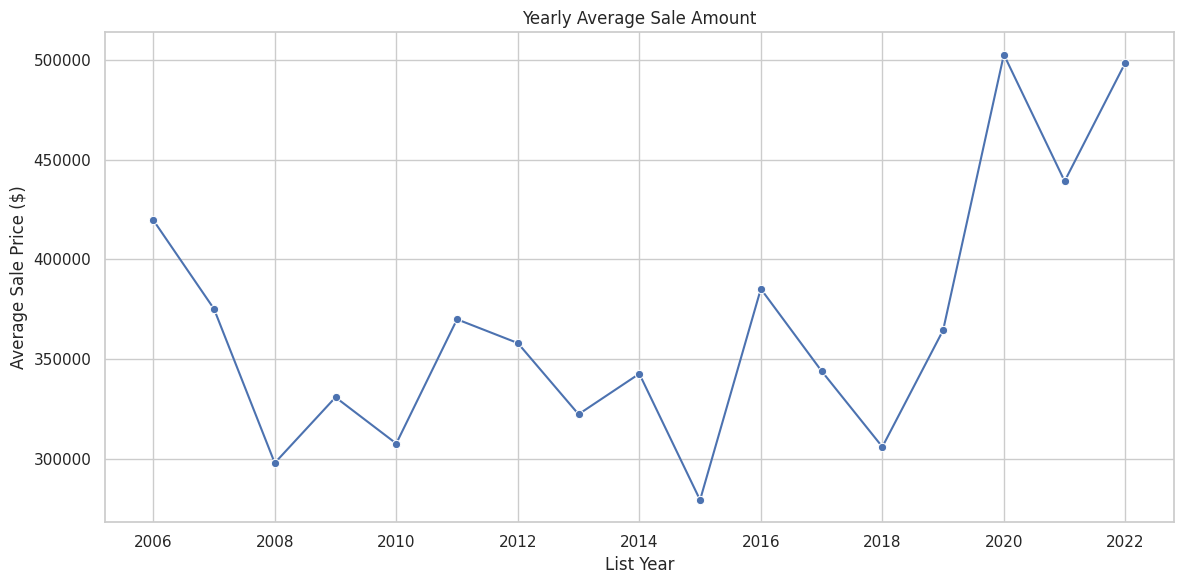

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

yearly_avg = real_estate_df.groupby('List Year')['Sale Amount'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg, x='List Year', y='Sale Amount', marker='o')
plt.title('Yearly Average Sale Amount')
plt.ylabel('Average Sale Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


* A line plot showing yearly average sale amounts, with a peak in 2020 indicating the highest market value.

## 4.3 Are there towns where properties tend to be over- or under-assessed compared to their sale price?

This chart shows the spread of Sales Ratios for the top 10 towns where properties usually sell below their assessed value.
  * The higher the box on the chart, the better the buyer's deal means higher ratio = lower sale price compared to value.
  * The flipped y-axis puts the best deals at the top visually.
  * Each box shows the middle 50% of sales, and the line inside shows the median ratio.


<ipython-input-120-c94c04c3bda9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_town_df, x='Town', y='Sales Ratio', palette='pastel')


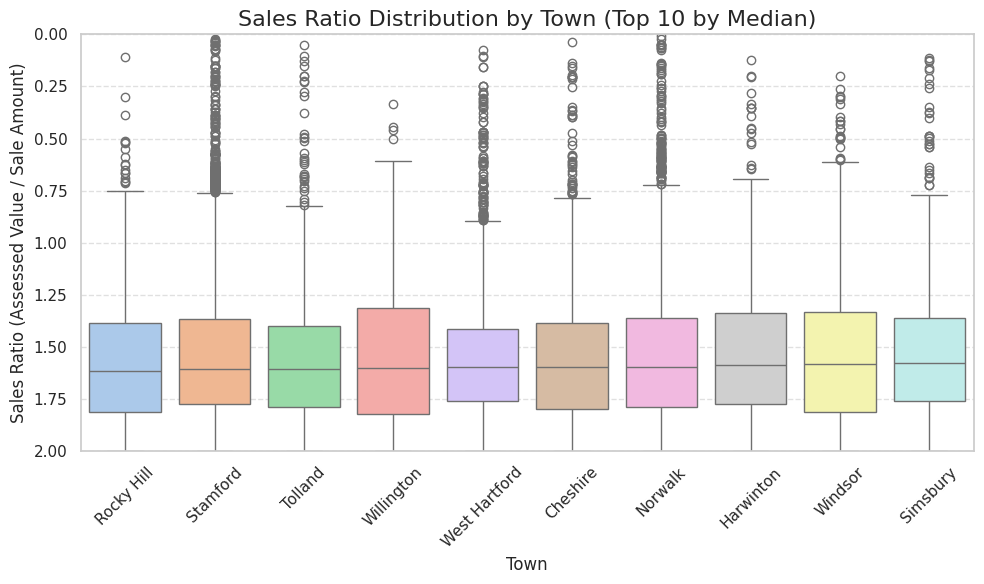

In [120]:
filtered_df = real_estate_df[
    (real_estate_df['Sale Amount'] > 10000) &
    (real_estate_df['Sales Ratio'] > 0) &
    (real_estate_df['Sales Ratio'] < 2)
]

top_towns = (
    filtered_df.groupby('Town')['Sales Ratio']
    .median()
    .sort_values(ascending=False)
    .head(10)
    .index
)

top_town_df = filtered_df[filtered_df['Town'].isin(top_towns)].copy()
top_town_df['Town'] = pd.Categorical(top_town_df['Town'], categories=top_towns, ordered=True)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.boxplot(data=top_town_df, x='Town', y='Sales Ratio', palette='pastel')

plt.title('Sales Ratio Distribution by Town (Top 10 by Median)', fontsize=16)
plt.ylabel('Sales Ratio (Assessed Value / Sale Amount)', fontsize=12)
plt.xlabel('Town', fontsize=12)
plt.ylim(2, 0)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

* By this graph we can see that the towns like Rocky Hill and Stamford have higher ratios, meaning homes are often sold for less than their assessed value.

## 4.4 Proportion of Sale Amounts by Property Type (Under $1M) Using Pie Chart

We filtered the dataset to include only properties with a Sale Amount less than $1,000,000 to focus on the more typical transactions. Then, we grouped the data by Property Type and calculated the total sale amount for each category.

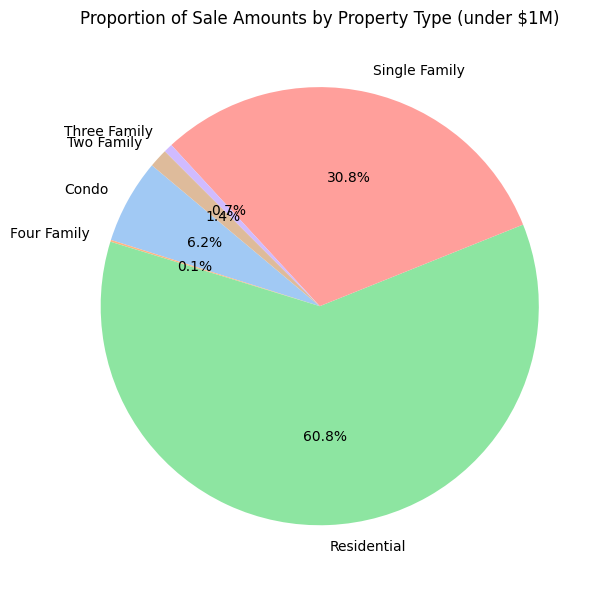

In [62]:
# Filter data
amount_under_1_000_000_df = real_estate_df[real_estate_df['Sale Amount'] < 1_000_000]

# Group by property type and sum sale amount
grouped = amount_under_1_000_000_df.groupby('Property Type')['Sale Amount'].sum()

plt.figure(figsize=(10, 6))
plt.pie(grouped,
        labels=grouped.index,
        autopct='%1.1f%%',
        startangle=140,
        colors = sns.color_palette("pastel", len(grouped)))

plt.title('Proportion of Sale Amounts by Property Type (under $1M)')
plt.tight_layout()
plt.show()

* The pie chart shows that Residential and Single Family properties together account for over 90% of total sale amounts for properties priced under $1 million.

## 4.5 Distribution of Sale Amounts Bottom 95% Using Histogram

This is a histogram that shows how most property sale amounts are spread out, after removing the top 5% of the highest-priced sales. By focusing on the bottom 95%, we get a better view of the common sale prices, without the chart being affected by a few very expensive properties.

The smooth curve (KDE line) helps us see the overall shape of the distribution more clearly.

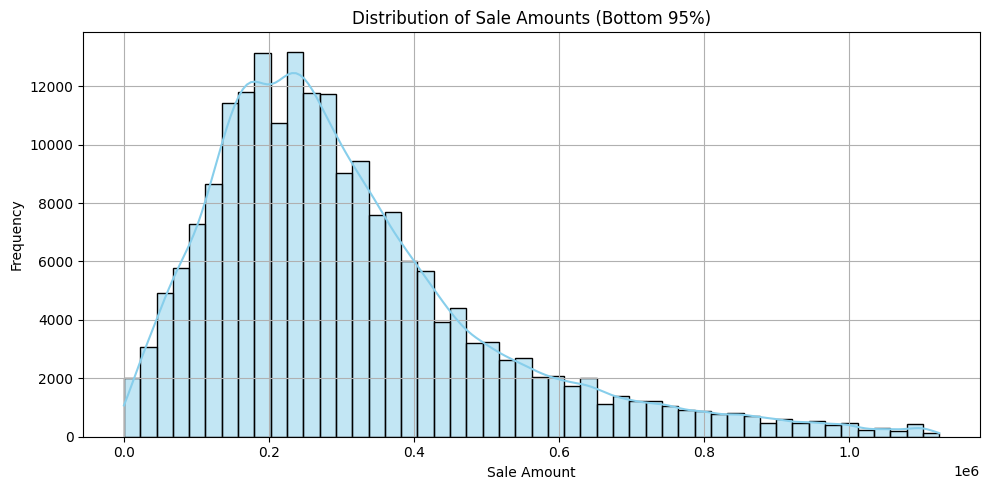

In [66]:
plt.figure(figsize=(10, 5))

filtered = real_estate_df[real_estate_df['Sale Amount'] < real_estate_df['Sale Amount'].quantile(0.95)]

sns.histplot(filtered['Sale Amount'], kde=True, bins=50, color='skyblue')

plt.title('Distribution of Sale Amounts (Bottom 95%)')
plt.xlabel('Sale Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


* The above graph shows that most houses were sold for prices between `$100,000` and `$400,000`, and as the price goes higher, the number of sales goes down.

## 4.6 Sale Amount by Property Type Using Boxplot with Log Scale

This boxplot shows the range of sale amounts for each property type. We used a log scale on the Y-axis to handle the wide range of prices and make it easier to compare different property types.

<ipython-input-68-418f93e05941>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=real_estate_df, x='Property Type', y='Sale Amount', palette='Set3')


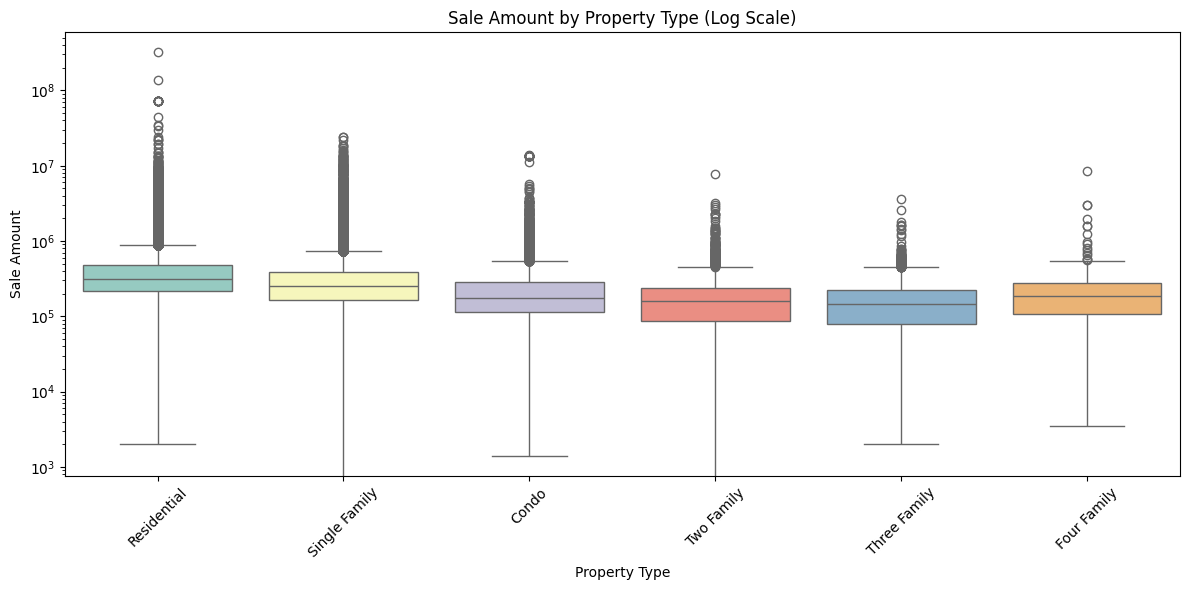

In [68]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=real_estate_df, x='Property Type', y='Sale Amount', palette='Set3')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Sale Amount by Property Type (Log Scale)')
plt.tight_layout()
plt.show()


* The above boxplot shows the sale price range for each property type using a log scale to handle large value differences. Most property types have similar price ranges, but Residential and Single Family properties show high value.

## 4.7 Sale Amount vs Assessed Value by Property Type Using Scatter Plot

This chart shows how sale prices compare to assessed values for 5,000 randomly chosen properties, excluding the very highest values. Different colors represent different property types.

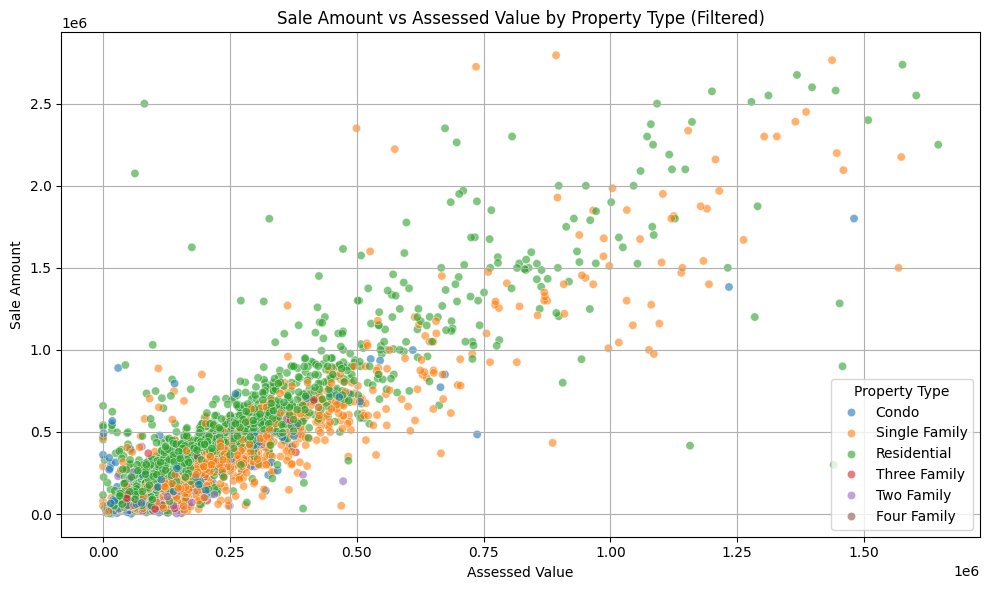

In [53]:
filtered = real_estate_df[
    (real_estate_df['Assessed Value'] < real_estate_df['Assessed Value'].quantile(0.99)) &
    (real_estate_df['Sale Amount'] < real_estate_df['Sale Amount'].quantile(0.99))
].sample(5000, random_state=42)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered, x='Assessed Value', y='Sale Amount', hue='Property Type', alpha=0.6)
plt.title("Sale Amount vs Assessed Value by Property Type (Filtered)")
plt.xlabel("Assessed Value")
plt.ylabel("Sale Amount")
plt.grid(True)
plt.tight_layout()
plt.show()



* The above graph shows how sale prices increase with assessed values for different property types. It highlights a clear positive trend and differences in pricing patterns across property types.

## 4.8 Top 10 Towns by Number of Property Transactions

This plot shows the 10 towns with the most property sales, helping identify areas with the highest real estate activity.

<ipython-input-49-b2ad3b2e108d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_town_transaction_counts.index, y=top_town_transaction_counts.values, palette='Set2')


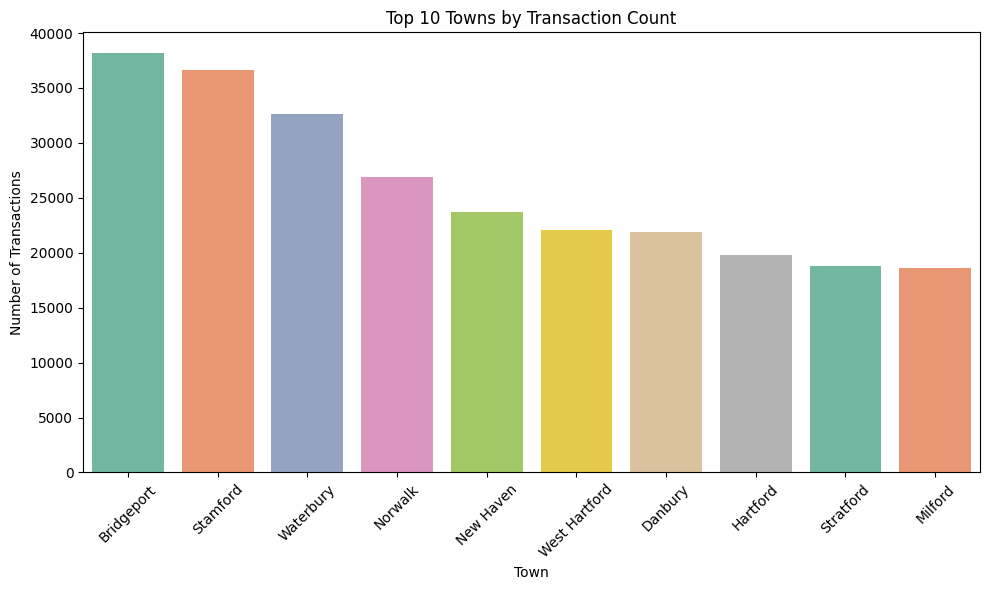

In [49]:

top_town_transaction_counts = df['Town'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_town_transaction_counts.index, y=top_town_transaction_counts.values, palette='Set2')
plt.title('Top 10 Towns by Transaction Count')
plt.xlabel('Town')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* The above bar graph shows which towns had the most property sales, with Bridgeport and Stamford leading in transaction.

## 4.9 Which Types of Homes Sell for the Most?

We are generating a bar graph showing the average sale price for the top 8 most common residential property types. The graph shows which types of homes, like condos or single-family houses, sell for the highest average prices.

<ipython-input-56-b56689063bd9>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-56-b56689063bd9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


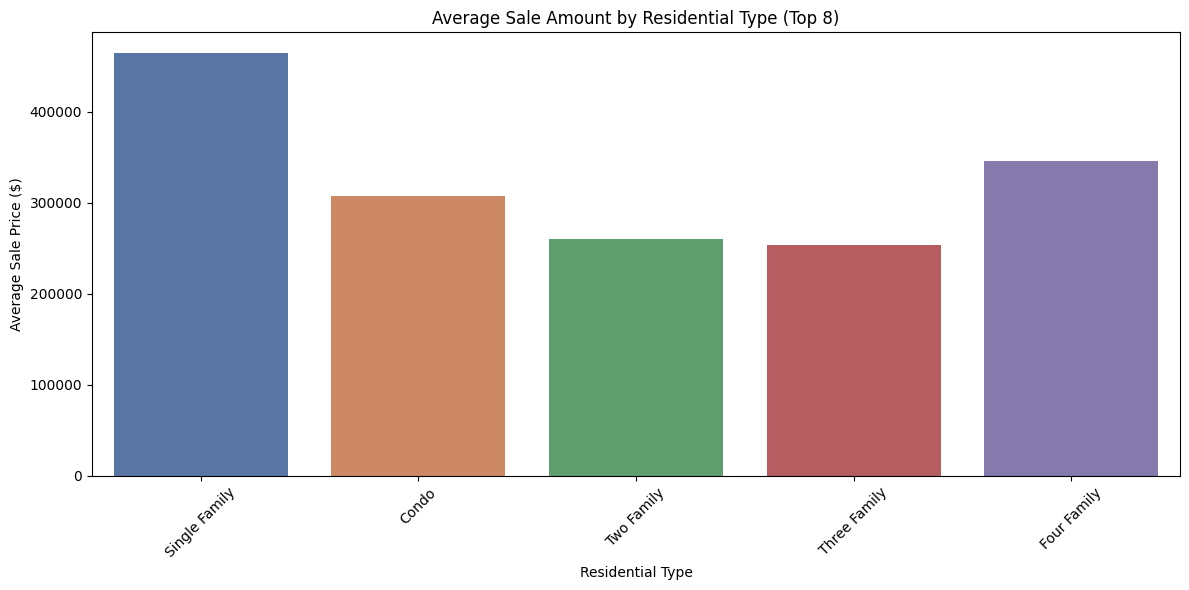

In [56]:
# Filter top 8 residential types
top_res_types = real_estate_df['Residential Type'].value_counts().head(8).index
filtered_res = real_estate_df[real_estate_df['Residential Type'].isin(top_res_types)]

plt.figure(figsize=(12, 6))
sns.barplot(
    data=filtered_res,
    x='Residential Type',
    y='Sale Amount',
    estimator=np.mean,
    ci=None,
    palette='deep'
)
plt.title('Average Sale Amount by Residential Type (Top 8)')
plt.xticks(rotation=45)
plt.ylabel('Average Sale Price ($)')
plt.tight_layout()
plt.show()




* From the above graph, we can see that Single Family homes have the highest average sale price.

## 4.10 What is the average sales ratio by property type?

This bar chart shows the average sales ratio for different types of properties.
The sales ratio means how much a property was actually sold for compared to its assessed value.

  * If the bar is higher, it means that type of property is usually sold for more than what it's worth on paper.

  * If the bar is lower, it means that type of property is sold for close to or less than its assessed value.

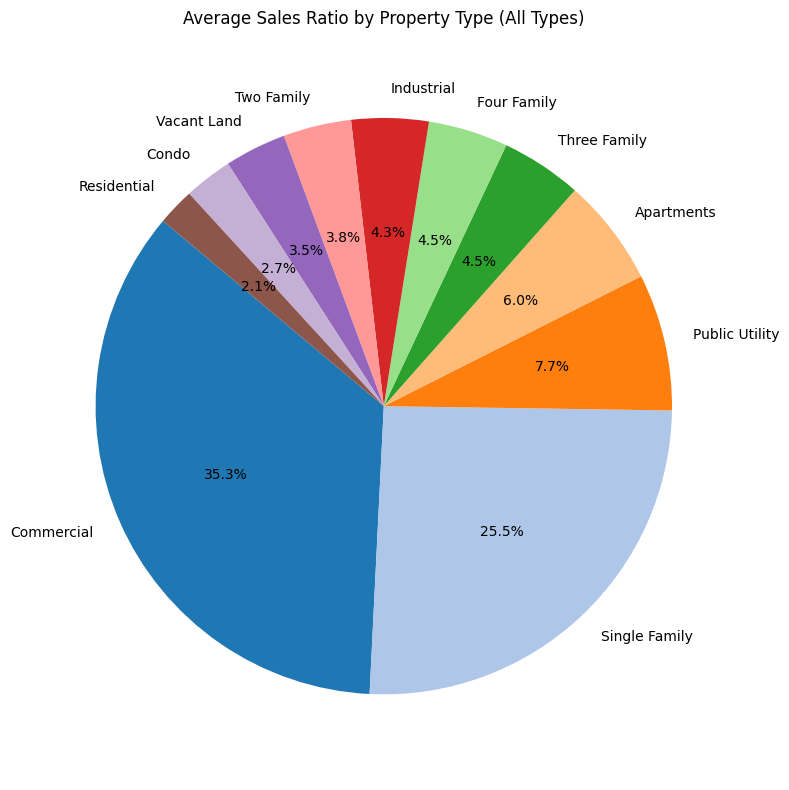

In [81]:
# 4. Average Sales Ratio by Property Type
avg_sales_ratio = df.groupby("Property Type")["Sales Ratio"].mean().sort_values(ascending=False)

# Plot pie chart with all property types
plt.figure(figsize=(8, 8))
plt.pie(
    avg_sales_ratio,
    labels=avg_sales_ratio.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('tab20', len(avg_sales_ratio))
)
plt.title("Average Sales Ratio by Property Type (All Types)")
plt.axis('equal')
plt.tight_layout()
plt.show()

* The above graph shows which types of properties sell for more money than they were valued at. Commercial and single family homes usually sell for a lot more, while condos and residential houses sell for about the same or less than their value.

## 4.11 What is the peak month for property transactions in each year?

This table shows the busiest month for property transactions in each year.
We check each year and find which month had the most recorded sales.

In [92]:
import calendar

real_estate_df['Year'] = real_estate_df['Date Recorded'].dt.year
real_estate_df['Month'] = real_estate_df['Date Recorded'].dt.month

monthly_trx = real_estate_df.groupby(['Year', 'Month']).size().reset_index(name='Transaction Count')

peak_months_by_year = monthly_trx.loc[
    monthly_trx.groupby('Year')['Transaction Count'].idxmax()
].sort_values('Year').reset_index(drop=True)

peak_months_by_year['Month'] = peak_months_by_year['Month'].apply(lambda x: calendar.month_name[x])

peak_months_by_year.rename(columns={'Month': 'Peak Month'}, inplace=True)

peak_months_by_year


,Year,Peak Month,Transaction Count
0,2001,September,2
1,2004,July,1
2,2005,August,1
3,2006,October,747
4,2007,August,863
5,2008,June,627
6,2009,November,742
7,2010,June,934
8,2011,June,652
9,2012,August,603


## 4.12 Which months have the most property transactions overall?

In this graph, we are showing how many total property transactions happened in each month across all years.

* This helps us identify which months are the busiest for real estate sales.
* A taller bar means that month had more transactions.
* This can reveal seasonal trends, such as whether homes are sold more often during summer or fall.

<ipython-input-93-c202efa4d659>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')


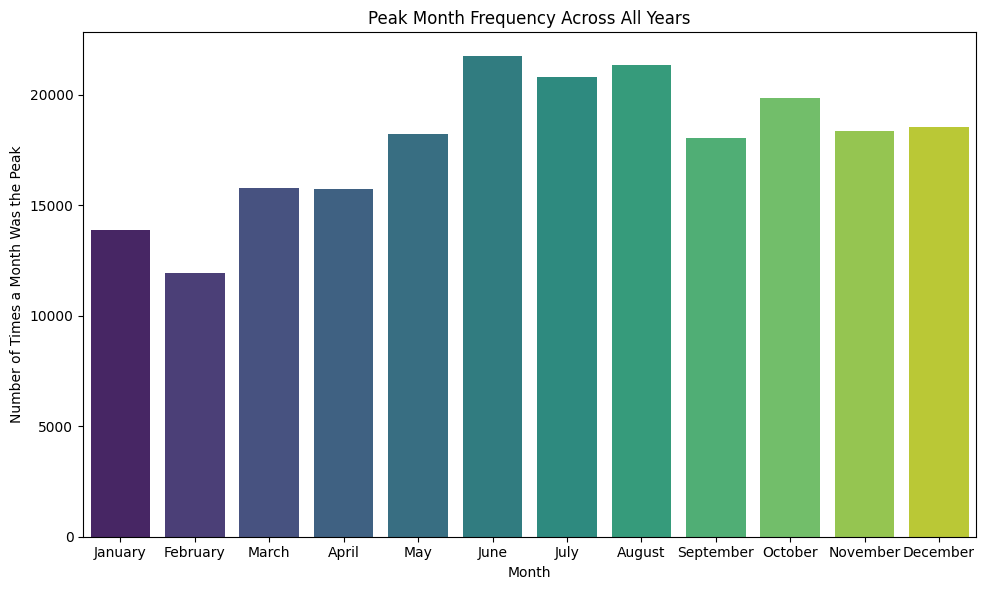

In [93]:

real_estate_df['Month Name'] = real_estate_df['Date Recorded'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

real_estate_df['Month Name'] = pd.Categorical(real_estate_df['Month Name'], categories=month_order, ordered=True)

month_counts = real_estate_df['Month Name'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')
plt.title('Peak Month Frequency Across All Years')
plt.xlabel('Month')
plt.ylabel('Number of Times a Month Was the Peak')
plt.tight_layout()
plt.show()

* By this graph we know, June, July, and August are the months with the highest number of property sales.
* These months likely represent the peak home buying season, especially during summer.
* February and January had the lowest number of transactions, suggesting fewer people buy or sell homes in the winter.

## 4.13 How do total real estate sales vary by town and year?

This heatmap shows the total sale amount of real estate each year for the top 10 towns with the most data.

* Each colored box tells how much property was sold in that town and year.Darker shades mean more sales. This helps you quickly see which towns and years were most active in real estate.

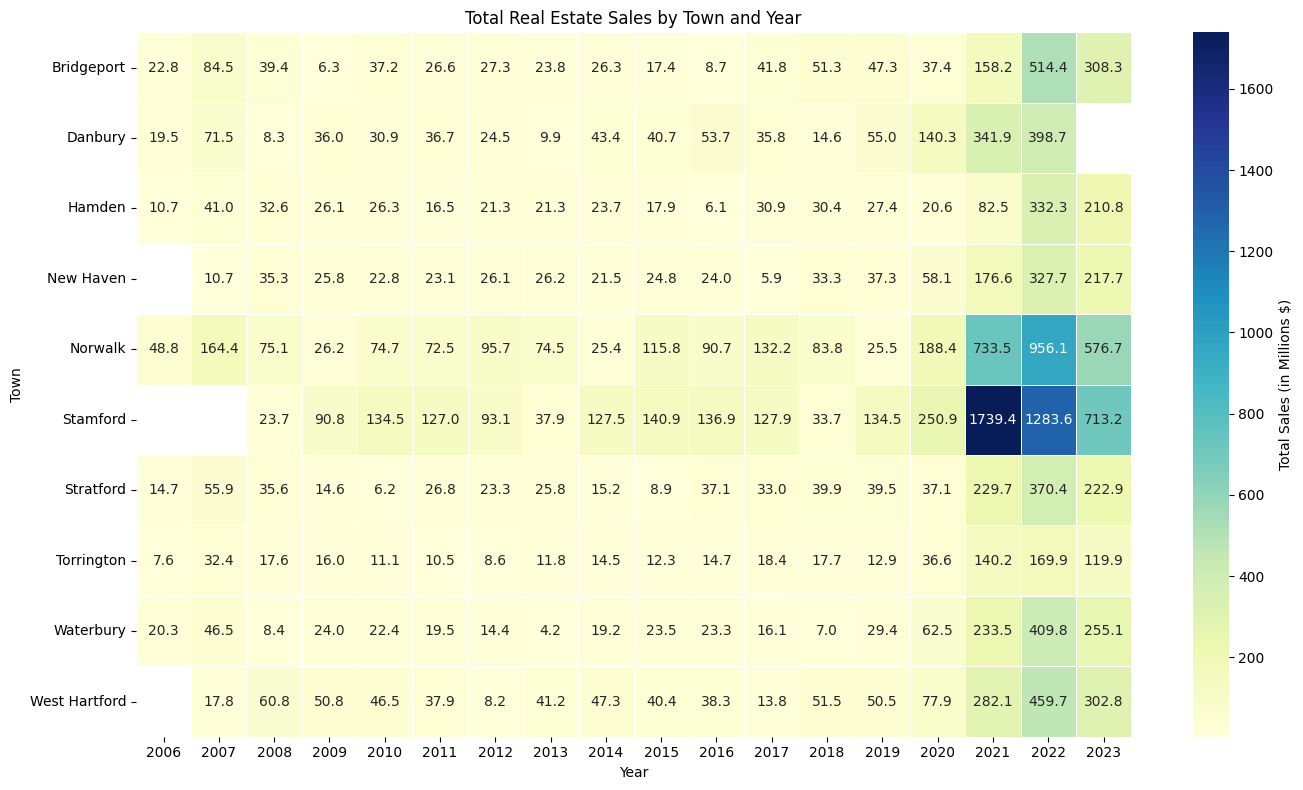

In [38]:

real_estate_df['Year'] = real_estate_df['Date Recorded'].dt.year

# Drop rows with missing Town, Year, or Sale Amount
df_filtered = real_estate_df.dropna(subset=['Town', 'Year', 'Sale Amount'])

# Step 1: Get top 10 towns by total number of records
top_towns = df_filtered['Town'].value_counts().nlargest(10).index

# Step 2: Filter for those towns only
df_top_towns = df_filtered[df_filtered['Town'].isin(top_towns)]

# Step 3: Group by Town and Year and sum Sale Amount
grouped = df_top_towns.groupby(['Town', 'Year'])['Sale Amount'].sum().reset_index()

# Step 4: Pivot table to create heatmap-ready structure
heatmap_data = grouped.pivot(index='Town', columns='Year', values='Sale Amount')

# Step 5: Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data / 1e6,  # Convert to millions
    cmap='YlGnBu',
    linewidths=0.5,
    annot=True,
    fmt='.1f',           # One decimal place
    cbar_kws={'label': 'Total Sales (in Millions $)'}
)

plt.title('Total Real Estate Sales by Town and Year')
plt.xlabel('Year')
plt.ylabel('Town')
plt.tight_layout()
plt.show()

* Each square shows the total sales amount in millions of dollars for a specific town and year.
* Darker blue shades mean higher total sales in that town and year.
* Lighter colors represent lower sales.
* For example, Stamford in 2020 had the highest sales activity, shown in deep blue with $1.7 billion.

## 4.14 Which towns have the highest average property sale prices?

This bar chart shows the top 10 towns with the highest average sale prices for properties.

  * These towns have properties that, on average, sell for more money than others.
  * A taller bar means the town’s properties are more expensive on average.
  * This helps spot premium or high-value areas, useful for both buyers and investors.

<ipython-input-39-970f975628c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_towns.index, y=top_towns.values, palette='viridis')


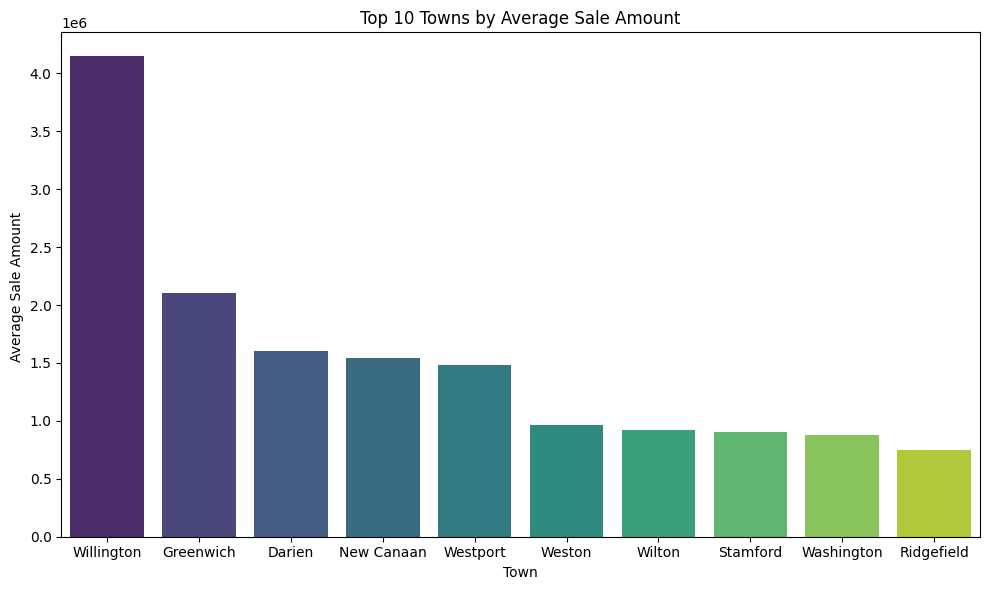

In [39]:

top_towns = df.groupby('Town')['Sale Amount'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_towns.index, y=top_towns.values, palette='viridis')
plt.title("Top 10 Towns by Average Sale Amount")
plt.xlabel("Town")
plt.ylabel("Average Sale Amount ")
plt.tight_layout()
plt.show()



* The bars show the average price of all properties sold in each town higher bars mean more expensive towns.
* Willington has the highest average sale price by far over $4 million on average.
* Towns like Greenwich, Darien, and New Canaan also have high property values.


## 4.15 What is the trend of total sale amounts over time?

This line chart shows how total property sale amounts have changed over time, using a 6-month rolling average to smooth out spikes and dips.

  * The line goes up and down to show how much property was sold each month.
  * It uses a 6-month average so we can see the overall trend, not just short term changes.
  * This helps us understand if the real estate market is growing, slowing down, or recovering.

<ipython-input-40-11de93b848dc>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = real_estate_df.set_index('Date Recorded').resample('M')['Sale Amount'].sum()


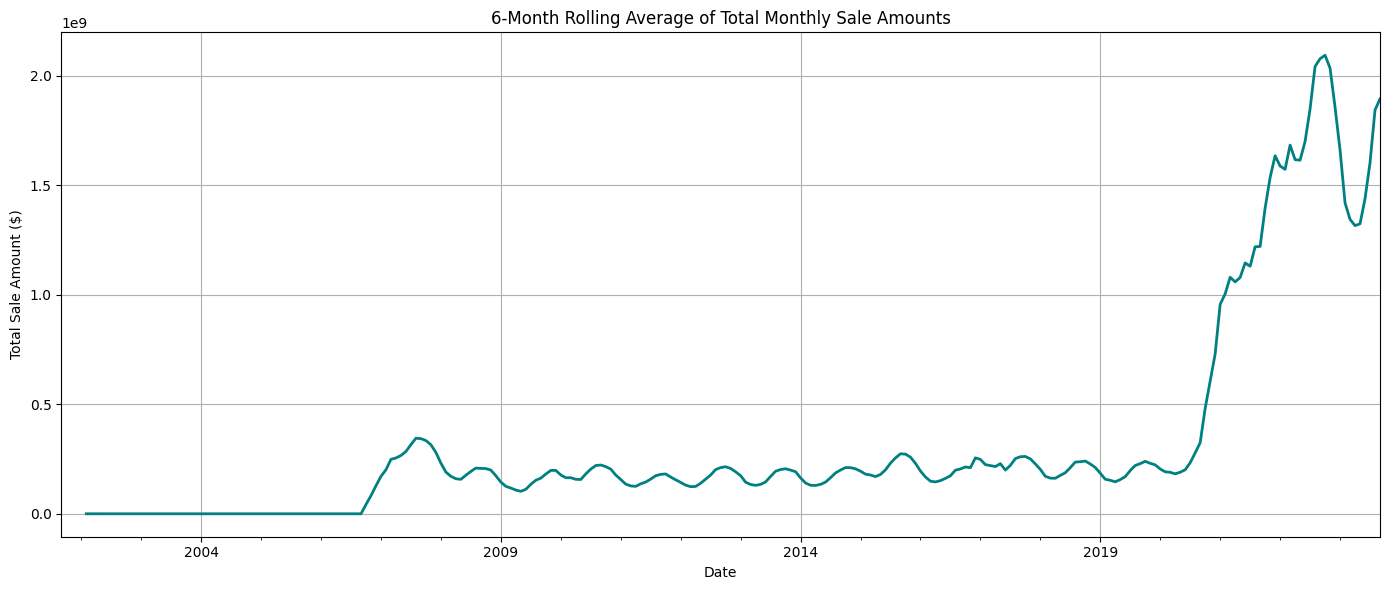

In [40]:

monthly_sales = real_estate_df.set_index('Date Recorded').resample('M')['Sale Amount'].sum()

# Plot rolling average
plt.figure(figsize=(14, 6))
monthly_sales.rolling(window=6).mean().plot(color='teal', linewidth=2)
plt.title('6-Month Rolling Average of Total Monthly Sale Amounts')
plt.ylabel('Total Sale Amount ($)')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()


* This chart shows how total monthly real estate sales have changed over time using a 6-month average. Sales spiked sharply around 2020, showing a big increase in market activity.

## 4.16 What is the distribution of sale amounts in the top 5 towns?

This violin plot shows how property sale amounts are distributed in the top 5 towns with the most transactions.

* The wider parts of the shape show where most sales happened the common price ranges.
* The thinner parts represent less frequent sale prices.
* The line inside shows the middle 50% of values.
* We use a log scale so both high and low sale amounts can be compared fairly.

<ipython-input-95-ac5c109b124a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-95-ac5c109b124a>:8: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


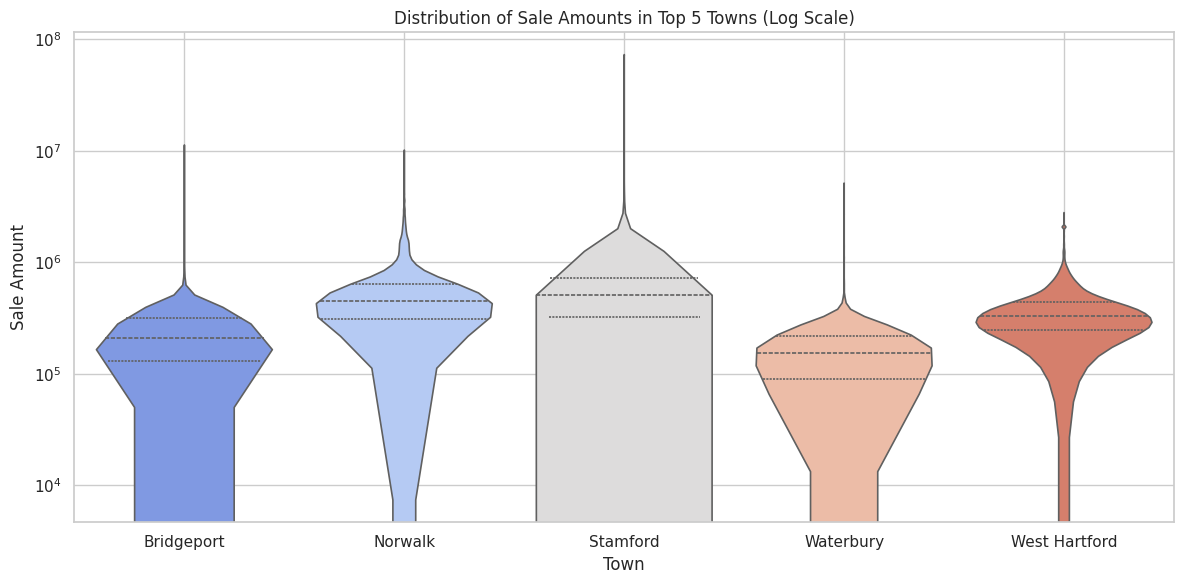

In [95]:
# Get top 5 towns by count
top_5_towns = real_estate_df['Town'].value_counts().nlargest(5).index
filtered_violin = real_estate_df[real_estate_df['Town'].isin(top_5_towns)]

# Plot violin plot
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.violinplot(
    data=filtered_violin,
    x='Town',
    y='Sale Amount',
    scale='width',
    inner='quartile',
    linewidth=1.2,
    palette='coolwarm'
)
plt.yscale('log')
plt.title('Distribution of Sale Amounts in Top 5 Towns (Log Scale)')
plt.grid(True)
plt.tight_layout()
plt.show()

* This graph shows how property sale prices vary in the top 5 towns.
Each town has a unique shape that tells us how prices are spread out:
  - Stamford has a wide price range, including many high value properties.
  - Bridgeport and Waterbury have more affordable sales, with fewer expensive ones.
  - The thicker middle section in each shape means most properties were sold at that price range.
  - Using a log scale helps us compare both cheap and expensive properties more clearly.

## 4.17 How are key numerical features like Sale Amount, Assessed Value, and Sales Ratio related?

This heatmap shows how closely related the key numeric features are:

  * A value close to 1 means a strong positive relationship as one goes up, so does the other.
  * A value close to -1 means a strong negative relationship.
  * Sale Amount and Assessed Value usually have a strong positive correlation, meaning properties with higher assessed value tend to sell for more.
  * Sales Ratio shows how much above or below a property sold compared to its assessed value.

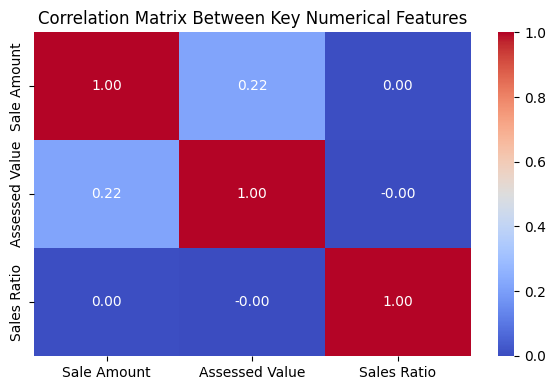

In [43]:
# Add Sales Ratio if not present
if 'Sales Ratio' not in real_estate_df.columns and 'Assessed Value' in real_estate_df.columns:
    real_estate_df['Sales Ratio'] = real_estate_df['Sale Amount'] / real_estate_df['Assessed Value']
    real_estate_df['Sales Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Plot correlation heatmap
numeric_cols = ['Sale Amount', 'Assessed Value', 'Sales Ratio']
corr_matrix = real_estate_df[numeric_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Between Key Numerical Features')
plt.tight_layout()
plt.show()


* Sale Amount and Assessed Value have a small positive link (0.22), which means properties with higher assessed value usually sell for more but not always.
* Sales Ratio doesn’t show any strong connection with either Sale Amount or Assessed Value, so it changes a lot depending on the situation.
* The value 1.00 on the diagonal just means each column is perfectly matched with itself which is normal.